<a href="https://colab.research.google.com/github/fjpa121197/DataScienceDM/blob/master/Lab4/Lab4_bank_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [0]:
#Read dataset 
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [0]:
#Preprocessing of data
#Turn string values to numbers  -- Credits to Varun @https://thispointer.com/how-to-get-check-data-types-of-dataframe-columns-in-python-pandas/
stringColumns = df.dtypes[df.dtypes == np.object]
stringColumnsName = list(stringColumns.index)

for x in stringColumnsName:
  df[[x]] = df[[x]].apply(LabelEncoder().fit_transform)

#Separate labels and target values
df_x = df.drop(['y'],axis = 1)
df_y = df['y']


In [0]:
#Decision tree classifier
tree = DecisionTreeClassifier()
tree_dummy = DummyClassifier()

scores = cross_val_score(tree, df_x, df_y, cv=10,scoring = make_scorer(acc))
tree_dummy.fit(df_x,df_y)

print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f"% (acc(df_y,tree_dummy.predict(df_x))))

ACC: 0.65 +/- 0.24
Dummy ACC: 0.80


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [0]:
#Convert categorical values into dummy values
df_dummies = pd.get_dummies(df)
df_dummies.head()

In [0]:
#Create a copy of current dataframe and then delete two columns (duration and y_no)
df_dummies_copy = df_dummies
df_dummies.drop(columns=['duration','y_no'],inplace=True)

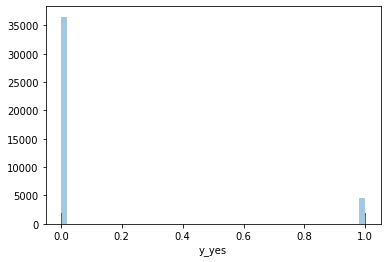

In [0]:
#Histogram of y_yes
sns_plot = sns.distplot(df_dummies['y_yes'], kde=False, rug=True)
